In [14]:

import numpy as np, sys

from keras.datasets import mnist

np.random.seed(1)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28)\
                                              / 255, y_train[0:1000])
one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))

for i,l in enumerate(y_test):
    test_labels[i][l]= 1


def tanh(x):
    return np.tanh(x)
def tanh2deriv(output):
    return 1 - (output ** 2)
def softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)

alpha, iterations, hidden_size = (2, 300, 100)
pixels_per_image, num_labels = (784, 10)
batch_size = 100


weight_0_1 = 0.02*np.random.random((pixels_per_image,hidden_size))-0.01
weight_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1


for j in range(iterations):
    correct_cnt = 0
    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end = ((i * batch_size), ((i+1)*batch_size))
        layer_0 = images[batch_start: batch_end]
        layer_1 = tanh(np.dot(layer_0, weight_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = softmax(np.dot(layer_1, weight_1_2))

        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == \
                          np.argmax(labels[batch_start+k:batch_start+k+1]))
        layer_2_delta = (labels[batch_start:batch_end]-layer_2)\
                                           / (batch_size * layer_2.shape[0])
        layer_1_delta = layer_2_delta.dot(weight_1_2.T) \
                                                       * tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weight_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weight_0_1 += alpha * layer_0.T.dot(layer_1_delta)
    test_correct_cnt = 0

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = tanh(np.dot(layer_0,weight_0_1))
        layer_2 = np.dot(layer_1,weight_1_2)
        test_correct_cnt += int(np.argmax(layer_2) == \
                                               np.argmax(test_labels[i:i+1]))
    if(j % 10 == 0):
        sys.stdout.write("\n"+ "I:" + str(j) + \
         " Test-Acc:"+str(test_correct_cnt/float(len(test_images)))+\
         " Train-Acc:" + str(correct_cnt/float(len(images))))


I:0 Test-Acc:0.394 Train-Acc:0.156
I:10 Test-Acc:0.6867 Train-Acc:0.723
I:20 Test-Acc:0.7025 Train-Acc:0.732
I:30 Test-Acc:0.734 Train-Acc:0.763
I:40 Test-Acc:0.7663 Train-Acc:0.794
I:50 Test-Acc:0.7913 Train-Acc:0.819
I:60 Test-Acc:0.8102 Train-Acc:0.849
I:70 Test-Acc:0.8228 Train-Acc:0.864
I:80 Test-Acc:0.831 Train-Acc:0.867
I:90 Test-Acc:0.8364 Train-Acc:0.885
I:100 Test-Acc:0.8407 Train-Acc:0.883
I:110 Test-Acc:0.845 Train-Acc:0.891
I:120 Test-Acc:0.8481 Train-Acc:0.901
I:130 Test-Acc:0.8505 Train-Acc:0.901
I:140 Test-Acc:0.8526 Train-Acc:0.905
I:150 Test-Acc:0.8555 Train-Acc:0.914
I:160 Test-Acc:0.8577 Train-Acc:0.925
I:170 Test-Acc:0.8596 Train-Acc:0.918
I:180 Test-Acc:0.8619 Train-Acc:0.933
I:190 Test-Acc:0.863 Train-Acc:0.933
I:200 Test-Acc:0.8642 Train-Acc:0.926
I:210 Test-Acc:0.8653 Train-Acc:0.931
I:220 Test-Acc:0.8668 Train-Acc:0.93
I:230 Test-Acc:0.8672 Train-Acc:0.937
I:240 Test-Acc:0.8681 Train-Acc:0.938
I:250 Test-Acc:0.8687 Train-Acc:0.937
I:260 Test-Acc:0.8684 Train-

1


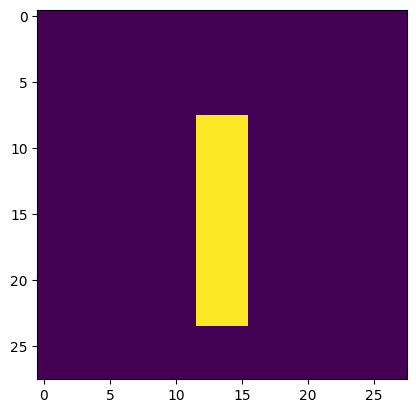

In [21]:
import matplotlib.pyplot as plt

m = [[0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0],
     [0,0,0,1,0,0,0],
     [0,0,0,1,0,0,0],
     [0,0,0,1,0,0,0],
     [0,0,0,0,0,0,0]]

m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
plt.imshow(m.reshape(28,28))

layer_0 = m
layer_1 = tanh(np.dot(layer_0,weight_0_1))
layer_2 = np.dot(layer_1,weight_1_2)

print(np.argmax(layer_2))
